# Import libs

In [1]:
library('igraph')
library('Matrix')
library('pracma')

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'Matrix' was built under R version 3.6.3"Warning message:
"package 'pracma' was built under R version 3.6.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



Create directed personal networks for users who have more than 2 circles. The data required
to create such personal networks can be found in the file named gplus.tar.gz.
**QUESTION 18:** How many personal networks are there?

In [2]:
path_to_files = "data/gplus/gplus"
#list of all files ending w circles
gpluscircles = list.files(path=path_to_files, pattern="*.circles")
count = 0
#for each circle file, read + check if > 2 lines. 
for (circle in gpluscircles){
    circle_path = paste(path_to_files, circle, sep="/")
    count = count + (length(readLines(circle_path)) > 2)*1
  
}
print(count)

[1] 57


**QUESTION 19:** For the 3 personal networks (node ID given below), plot the in-degree and outdegree distribution of these personal networks. Do the personal networks have a similar in and out
degree distribution? In this question, you should have 6 plots.
• 109327480479767108490
• 115625564993990145546
• 101373961279443806744

**QUESTION 20:** For the 3 personal networks picked in Question 19, extract the community
structure of each personal network using Walktrap community detection algorithm. Report the
modularity scores and plot the communities using colors. Are the modularity scores similar? In this
question, you should have 3 plots.



[1] "data/gplus/gplus/109327480479767108490.edges"


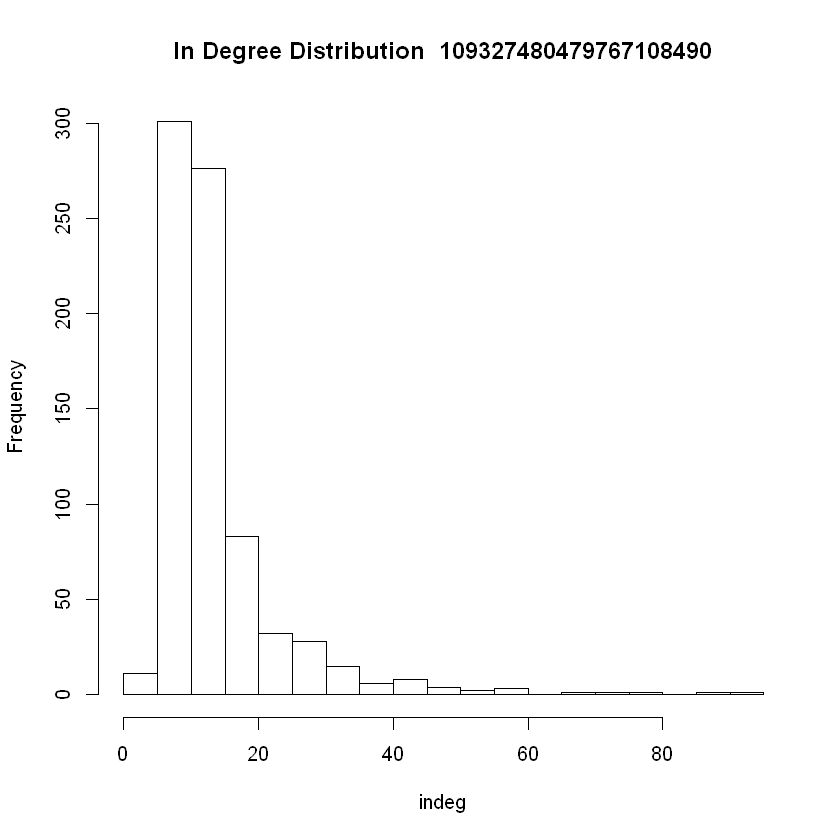

[1] "109327480479767108490  modularity is  0.252765387296677"


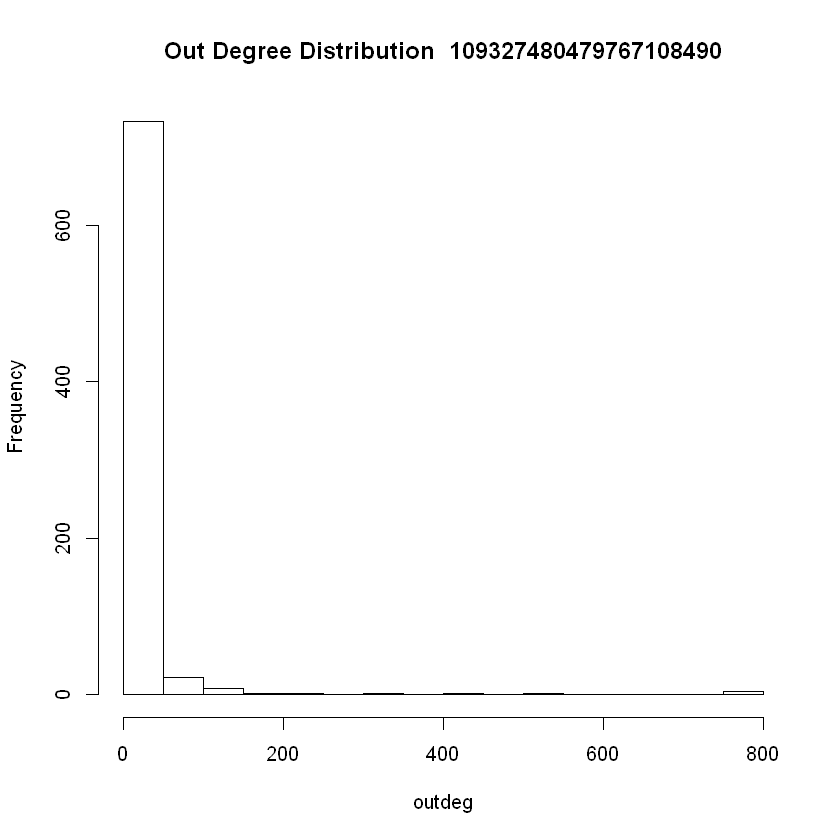

[1] "data/gplus/gplus/115625564993990145546.edges"


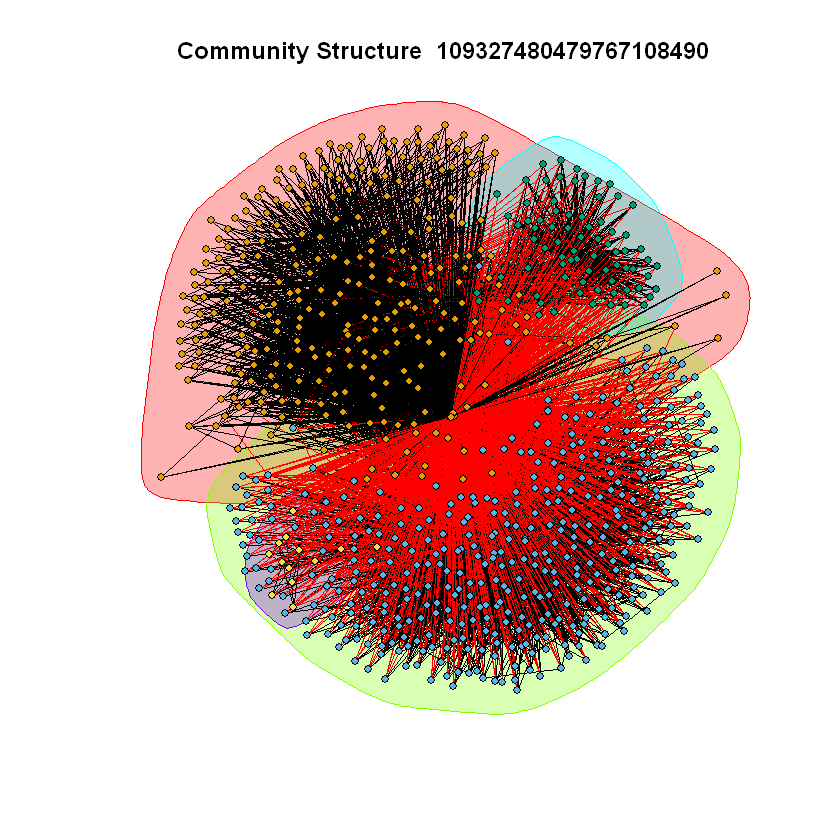

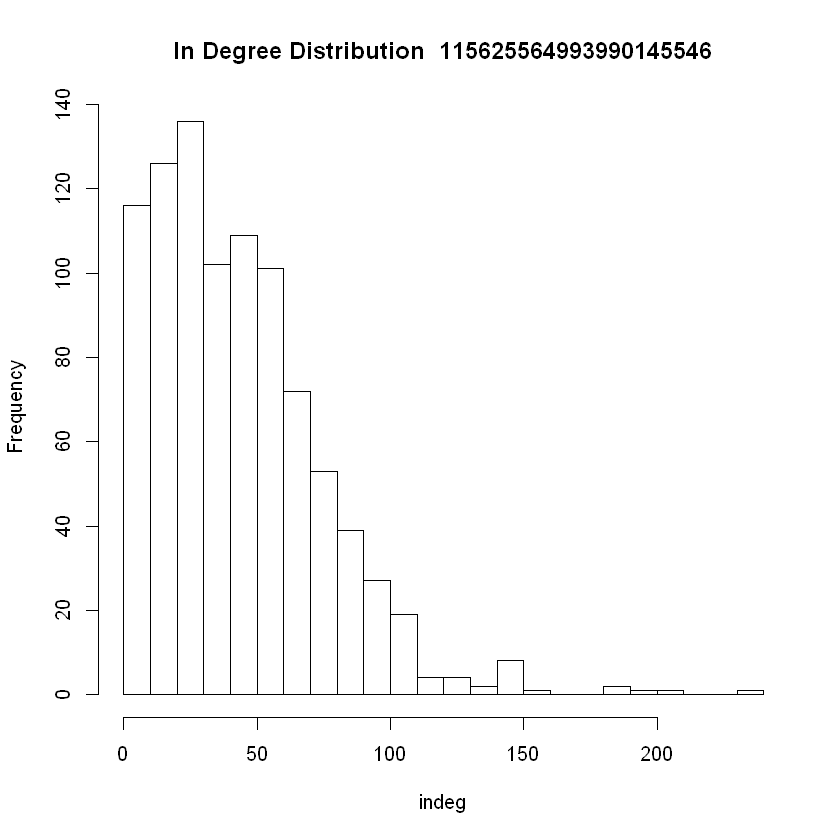

[1] "115625564993990145546  modularity is  0.319472551345825"


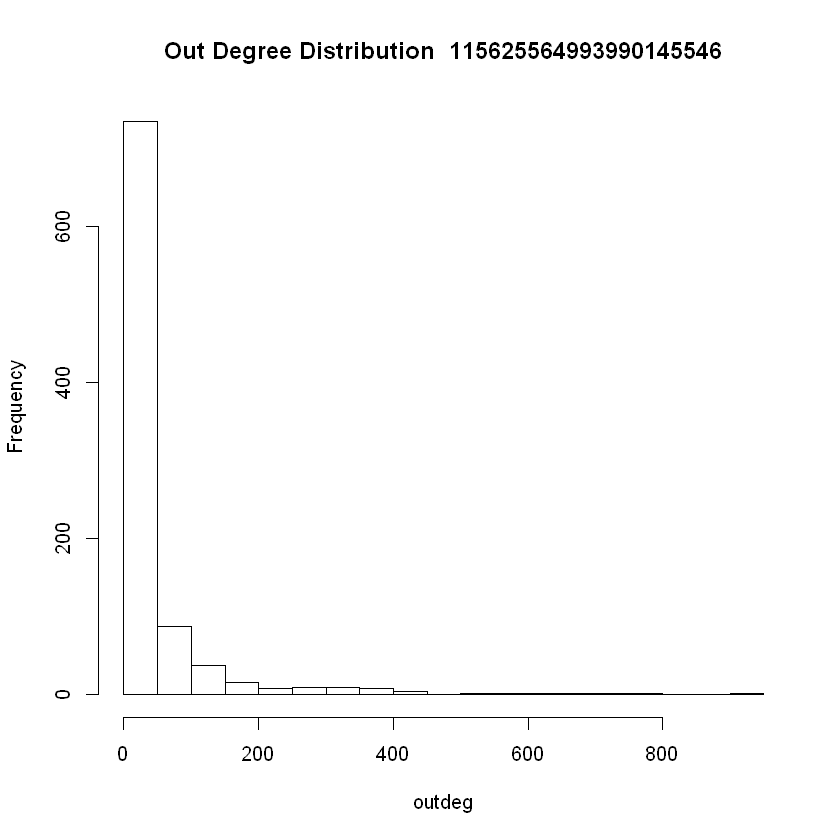

[1] "data/gplus/gplus/101373961279443806744.edges"


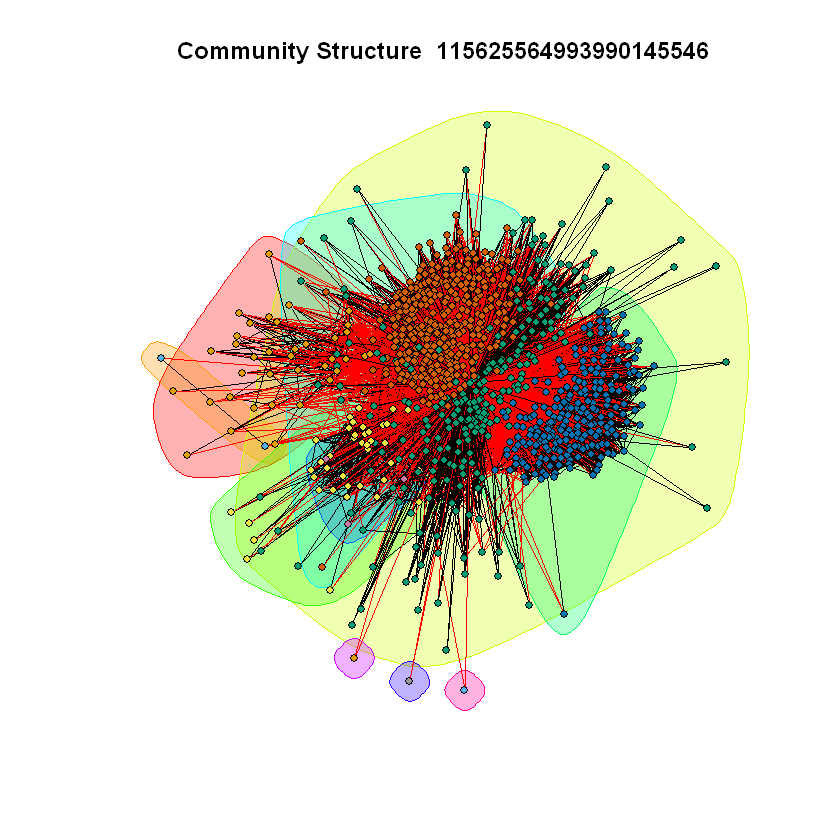

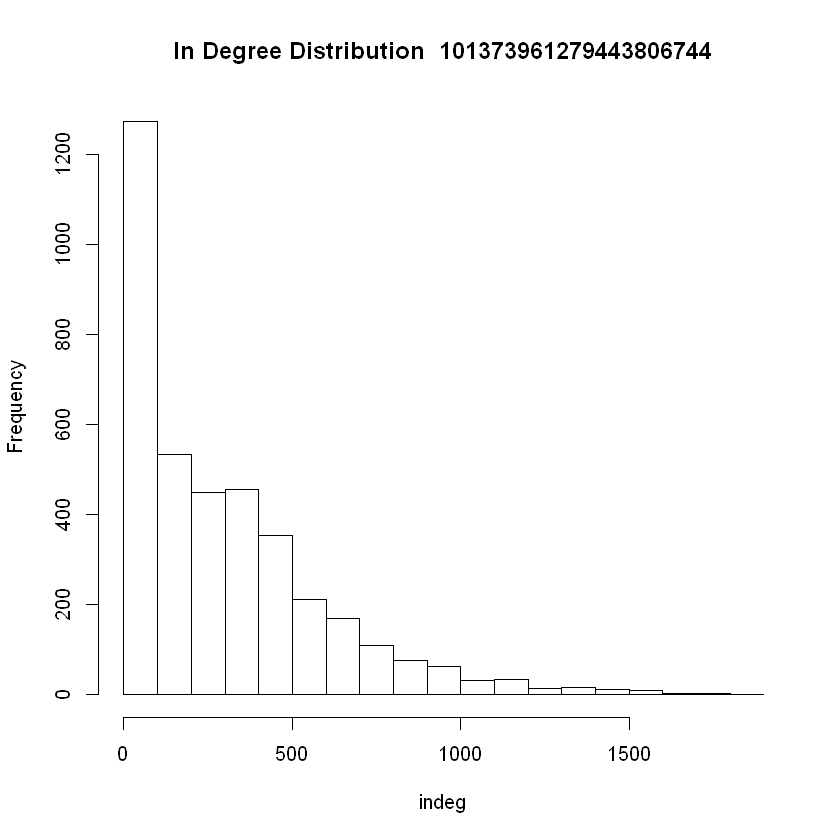

[1] "101373961279443806744  modularity is  0.191090270876884"


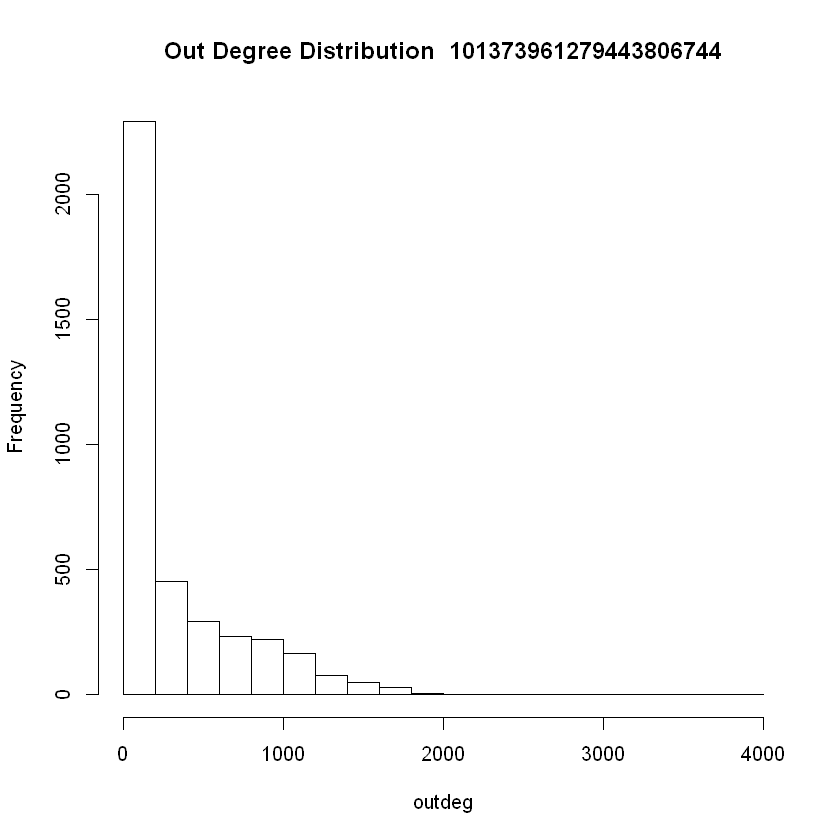

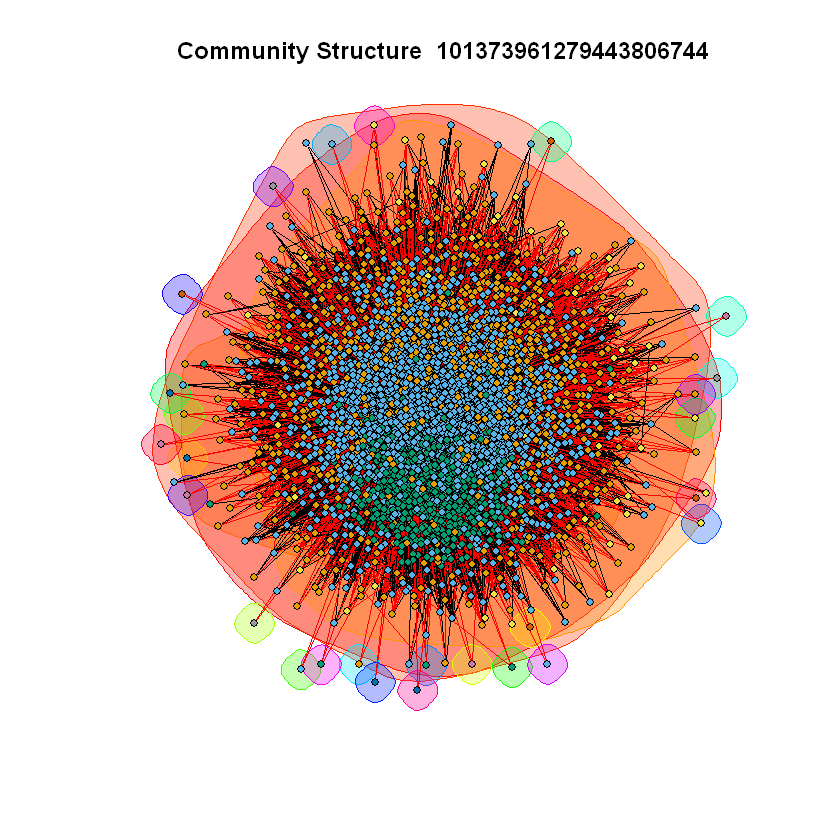

In [26]:
nets = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
comms = c()
for (net1 in nets){
    #net1 = "109327480479767108490"
    net1_path = paste(path_to_files, "/", net1, ".edges", sep = "")
    print(net1_path)
    #Read in graph from file
    graph1 = read_graph(net1_path, format="ncol", directed=TRUE)
    #Add vertices for each entry 
    graph1 = add.vertices(graph1, nv = 1, name = net1)

    edges = c()
    for (i in seq(1, vcount(graph1)-1, 1)){
        #vcount(graph1) corresponds to vertex "net1"
        #So create an edge from you to any other node
        edges = c(edges, c(vcount(graph1),i))
    }

    #add edges, then plot in/out degrees
    graph1 = add_edges(graph1, edges)
    indeg = degree(graph1, mode = "in")
    hist(indeg, main = paste("In Degree Distribution ", net1), breaks=25)
    outdeg = degree(graph1, mode = "out")
    hist(outdeg, main = paste("Out Degree Distribution ", net1), breaks=25)

    png(file=paste("plots/q20_", net1, "indeg.png", sep=""), width=600, height=450)
    hist(indeg, main = paste("In Degree Distribution ", net1), breaks=25)
    dev.off()
    
    png(file=paste("plots/q20_", net1, "outdeg.png", sep=""), width=600, height=450)
    hist(outdeg, main = paste("Out Degree Distribution ", net1), breaks=25)
    dev.off()
   
    community  = walktrap.community(graph1)
    modularity = modularity(community)

    print(paste(net1, " modularity is ", modularity))
    #edge.arrow.mode=0, edge.lty=0,
    plot(community, graph1, main=paste("Community Structure ", net1), edge.arrow.size=.4,  vertex.size=3, vertex.label="", edge.arrow.mode=0)
    png(file=paste("plots/q21_", net1, "comm.png", sep=""), width=600, height=450)
    plot(community, graph1, main=paste("Community Structure ", net1), edge.arrow.size=.4,  vertex.size=3, vertex.label="", edge.arrow.mode=0)
    dev.off()
    comms = c(comms, community)
}

**QUESTION 22:** Compute the h and c values for the community structures of the 3 personal
network (same nodes as Question 19). Interpret the values and provide a detailed explanation. Are
there negative values? Why?


In [6]:
nets = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
for (net in nets){
    circle_path = paste(path_to_files, "/", net, ".circles", sep = "")
    print(circle_path)
    circles_lines = readLines(circle_path)
    print("circles lines")
    #print(circles_lines)
    #circles will be an array where each entry is a circle (and each circle has many nodes)
    circles = c()
    #all_members will be flat version of circles
    all_members = c()
    for (line in circles_lines){

        #split the read line into array 
        arr =  strsplit(line,"\t")[[1]]
        #First element is not a node, so remove it
        arr = arr[2:length(arr)]
        #print(length(arr))
        circles = c(circles,  list(arr) )
        all_members = c(all_members, arr)
    }
    all_members = unique(all_members)
    #N = number of unique els among all circles
    N = length(all_members)
    

    #ai = length(Ci)
    ais = c()
    for (circ in circles){
        ais = c(ais, length(circ))
    }
    #print("ais")
    #print(ais)
    #compute H(C)
    hc = 0
    for (ai in ais){
        #For all "if != 0" checks: if ai = 0, then log(0) gives error.
        #But we have factor of ai at front, so if 0 then we don't need to add
        if (ai != 0){
            hc = hc + ai/N * log(ai/N)
        }
    }
    hc = -1*hc
        
    #Get community
    #print("hc")
    #print(hc)
    net_path = paste(path_to_files, "/", net, ".edges", sep = "")
    graph = read_graph(net_path, format="ncol", directed=TRUE)
    graph = add.vertices(graph, nv = 1, name = net)
    edges = c()
    for (i in seq(1, vcount(graph)-1, 1)){
        edges = c(edges, c(vcount(graph),i))
    }

    graph = add_edges(graph, edges)
    community  = walktrap.community(graph)
    #print("got community structure")
    #|K| and |C|
    num_communities = max(community$membership)
    num_circles = length(circles)
    nodes = V(graph)$name
    #bj = numver of nodes in community j (Kj) and has circle data
    bjs = c()
    hk = 0

    #Compute H(K)
    for (j in 1:num_communities){
        #print(community$membership)
        #print(community$membership == j)

        #for each node, check if 1. in commmunity and 2. has circle data
        comm_nodes = nodes[which(community$membership == j)]
        bj = 0
        for (node in comm_nodes){
            if (node %in% all_members){
                bj = bj + 1
            }
        }

        if (bj != 0){
            hk = hk + bj/N * log(bj/N)
        }
        bjs = c(bjs, bj)

    }
    hk = hk * -1

    
    hc_given_k = 0
    hk_given_c = 0
    #Lastly loop over i and j, compute H(K|C) H(C|K)
    for (j in 1:num_communities){
        #Kj = community j
        Kj = nodes[which(community$membership == j)]
        bj = bjs[j]

        #loop over circles
        for (i in 1:num_circles){
            #check how many in Ci and Kj
            Ci = circles[[i]]
            #print("circle i")
            #print(Ci)
            Aji = 0
            for (node in Kj){
                if (node %in% Ci){
                    Aji = Aji + 1
                }
            }
            if (Aji != 0){
                hc_given_k = hc_given_k + Aji/N*log(Aji/bj)
                hk_given_c = hk_given_c + Aji/N*log(Aji/ais[i])
            }

        } 

    }
    hc_given_k = hc_given_k * -1
    hk_given_c = hk_given_c * -1

    print(paste("H(C)", hc, "H(K)", hk, "H(C|K)", hc_given_k, "H(K|C)", hk_given_c))
    homogeneity = 1 - hc_given_k/hc
    completeness = 1 - hk_given_c/hk
    print(paste("Net: ", net, "h = ", homogeneity, "c = ", completeness))
    #####
  
}

[1] "data/gplus/gplus/109327480479767108490.circles"
[1] "circles lines"
[1] "H(C) 1.05077934757594 H(K) 1.00520818089008 H(C|K) 0.155636061763332 H(K|C) 0.673616224340775"
[1] "Net:  109327480479767108490 h =  0.851885115440867 c =  0.329873913536689"
[1] "data/gplus/gplus/115625564993990145546.circles"
[1] "circles lines"
[1] "H(C) 8.46514668159249 H(K) 1.08119096358335 H(C|K) 4.63982898243534 H(K|C) 4.78314811509253"
[1] "Net:  115625564993990145546 h =  0.451890303032235 c =  -3.4239623491117"
[1] "data/gplus/gplus/101373961279443806744.circles"
[1] "circles lines"
[1] "H(C) 0.384319958960942 H(K) 0.493330612772394 H(C|K) 0.382833906292573 H(K|C) 1.23541745845449"
[1] "Net:  101373961279443806744 h =  0.0038667069813052 c =  -1.5042383879479"
